<a href="https://colab.research.google.com/github/freakezoide/codigos-de-coolab/blob/main/fallecidos_en_accidentes_de_transito_desde_el_2014_hasta_el_2019_con_ARIMA_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.dates import DateFormatter

# Configuración inicial
plt.style.use('ggplot')
sns.set_palette("husl")


#Archivos para cada año: 2019-2023
years = range(2014, 2019)
dfs = []

for year in years:
    # Specify the encoding as 'latin-1' when reading the CSV file
    temp_df = pd.read_csv(f'fallecidos-nueva-2019.csv', encoding='latin-1')
    temp_df['Fechayhora'] = pd.to_datetime(temp_df['Fechayhora'])
    temp_df['Año'] = year
    dfs.append(temp_df)

df = pd.concat(dfs)


# Procesamiento temporal
df['Mes'] = df['Fechayhora'].dt.month
df['Semana'] = df['Fechayhora'].dt.isocalendar().week
df['DiaSemana'] = df['Fechayhora'].dt.day_name()
df['Trimestre'] = df['Fechayhora'].dt.quarter

## 1. Evolución anual (2014-2019)
plt.figure(figsize=(15, 8))

# Serie temporal mensual
ax1 = plt.subplot(2, 2, 1)
monthly = df.groupby([pd.Grouper(key='Fechayhora', freq='M'), 'Año']).size().unstack()
monthly.plot(ax=ax1, marker='o')
plt.title('Evolución Mensual de Accidentes (2014-2019)')
plt.ylabel('Cantidad de accidentes')
plt.xlabel('Fecha')

# Comparación anual
ax2 = plt.subplot(2, 2, 2)
annual = df.groupby('Año').size()
sns.barplot(x=annual.index, y=annual.values, ax=ax2)
plt.title('Total de Accidentes por Año')
plt.ylabel('Cantidad')

# Distribución mensual comparada
ax3 = plt.subplot(2, 2, 3)
month_dist = df.groupby(['Mes', 'Año']).size().unstack()
sns.heatmap(month_dist, cmap="YlOrRd", annot=True, fmt='g', ax=ax3)
plt.title('Distribución Mensual por Año')
plt.xlabel('Año')
plt.ylabel('Mes')

# Comparación por trimestre
ax4 = plt.subplot(2, 2, 4)
quarter_dist = df.groupby(['Trimestre', 'Año']).size().unstack()
quarter_dist.plot(kind='bar', stacked=True, ax=ax4)
plt.title('Distribución por Trimestre')
plt.xlabel('Trimestre')
plt.legend(title='Año')

plt.tight_layout()
plt.show()


Análisis comparativo por variables clave

In [ ]:
variables = ['TipodeSiniestro', 'Vehiculo', 'Sexo', 'Departamento']

plt.figure(figsize=(18, 12))
for i, var in enumerate(variables, 1):
    plt.subplot(2, 2, i)
    temp = df.groupby([var, 'Año']).size().unstack()
    temp.plot(kind='bar', stacked=True)
    plt.title(f'Evolución de {var} por año')
    plt.xticks(rotation=45)
    plt.legend(title='Año')

plt.tight_layout()
plt.show()

Heatmap de riesgo por hora y día

<Figure size 1200x800 with 0 Axes>

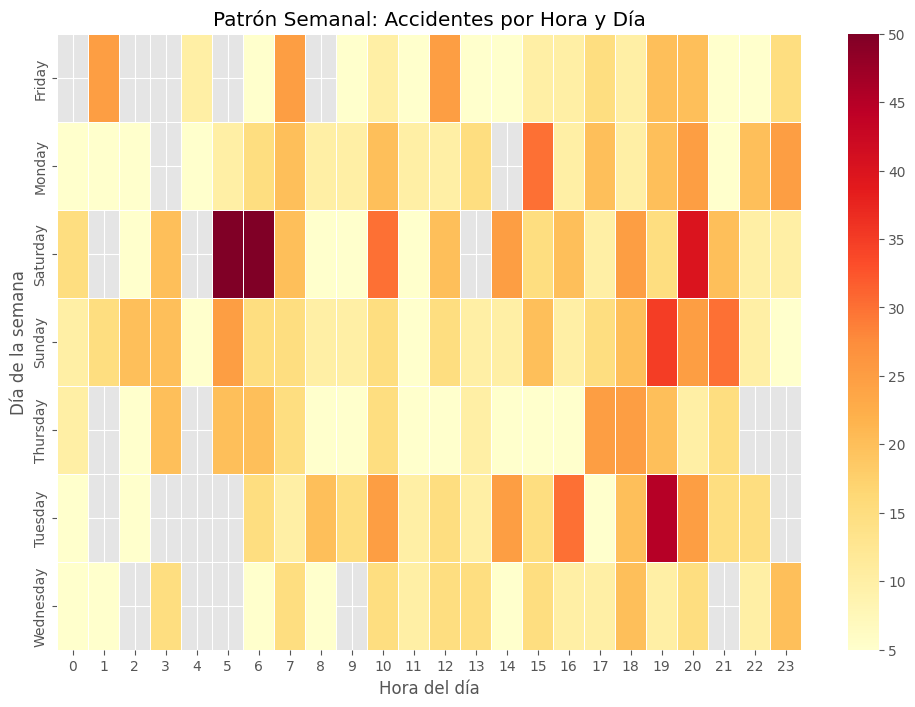

In [11]:
plt.figure(figsize=(12, 8))
df['Hora'] = df['Fechayhora'].dt.hour

plt.figure(figsize=(12, 8))
hour_day = df.groupby(['DiaSemana', 'Hora']).size().unstack()
sns.heatmap(hour_day, cmap="YlOrRd", linewidths=.5)
plt.title('Patrón Semanal: Accidentes por Hora y Día')
plt.ylabel('Día de la semana')
plt.xlabel('Hora del día')
plt.show()

Análisis de supervivencia

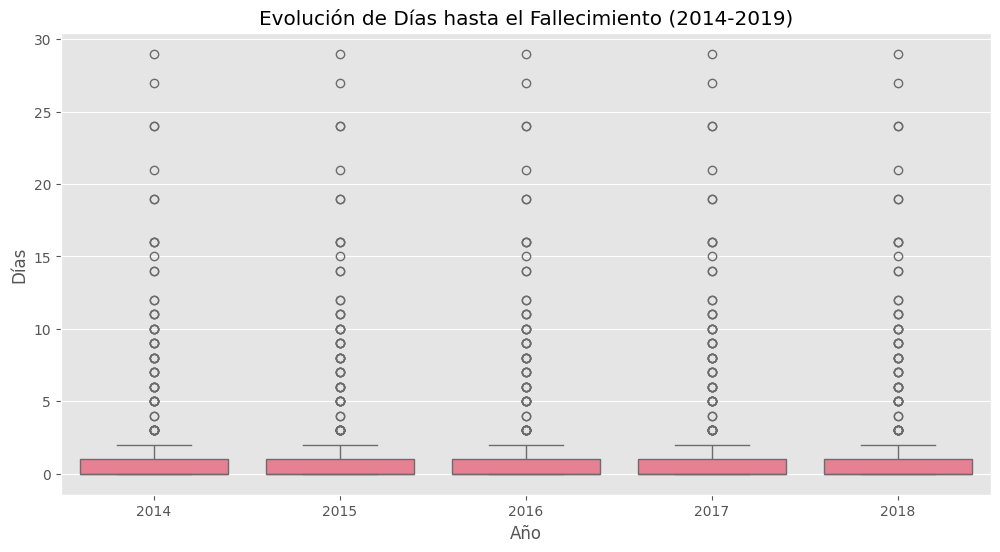


🔍 Principales Hallazgos (2014-2019):
- Tendencia general: ↓ (0.0% anual)
- Mes consistentemente más peligroso: 12
- Hora pico estable: 5:00 hs
- Departamento con mayor crecimiento: ARTIGAS
- Vehículo con mayor aumento: AUTO


In [12]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Año', y='FallecidoalosDias', data=df)
plt.title('Evolución de Días hasta el Fallecimiento (2014-2019)')
plt.ylabel('Días')
plt.xlabel('Año')
plt.show()

## Hallazgos clave multi-anual
print("\n🔍 Principales Hallazgos (2014-2019):")
print(f"- Tendencia general: {'↑' if annual.diff().mean() > 0 else '↓'} ({annual.pct_change().mean():.1%} anual)")
print("- Mes consistentemente más peligroso:", month_dist.mean(axis=1).idxmax())
print("- Hora pico estable:", f"{hour_day.mean().idxmax()}:00 hs")
print("- Departamento con mayor crecimiento:", df.groupby(['Departamento','Año']).size().unstack().diff(axis=1).mean(axis=1).idxmax())
print("- Vehículo con mayor aumento:", df.groupby(['Vehiculo','Año']).size().unstack().diff(axis=1).mean(axis=1).idxmax())

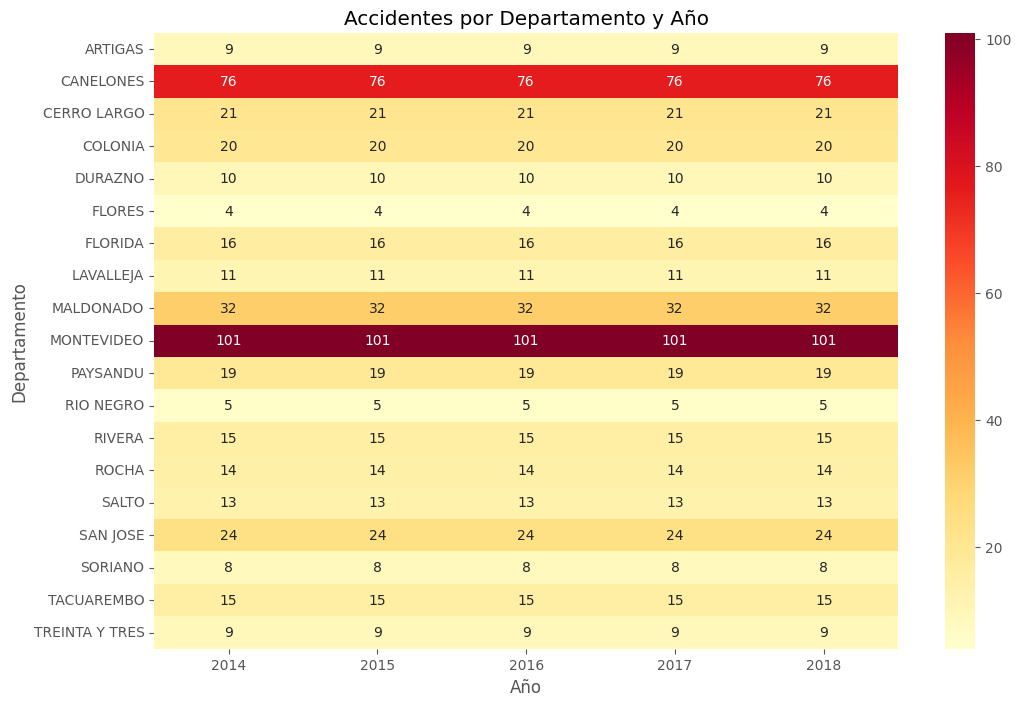

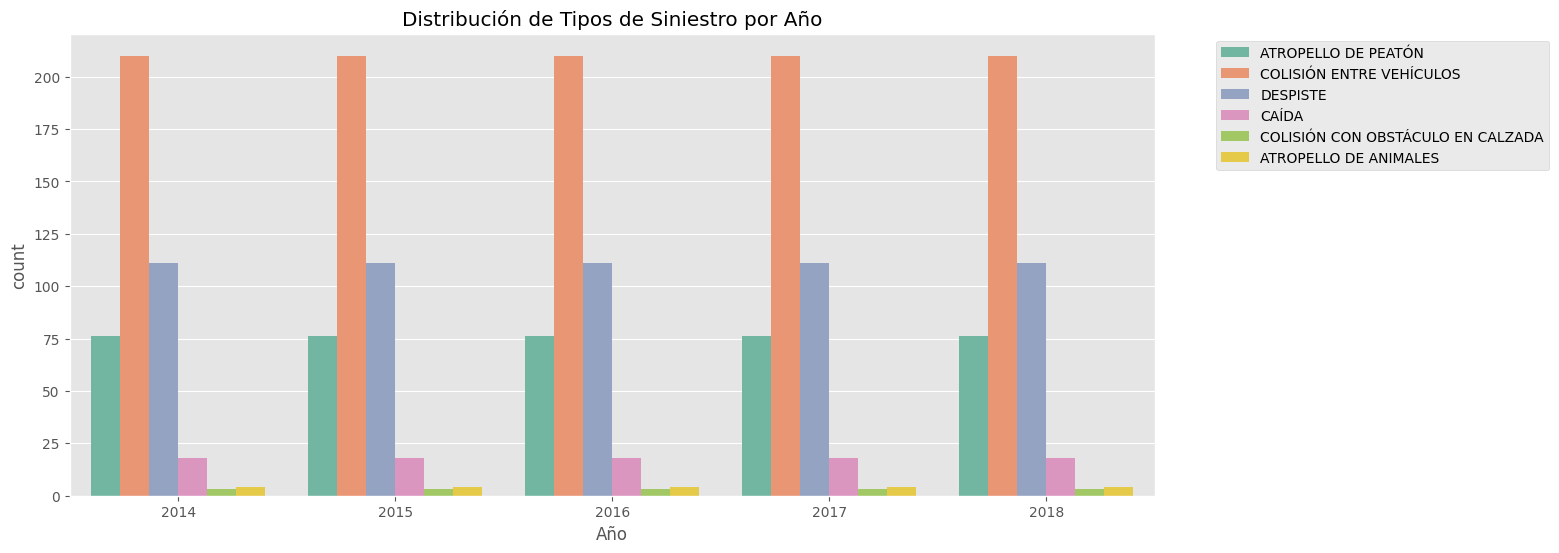

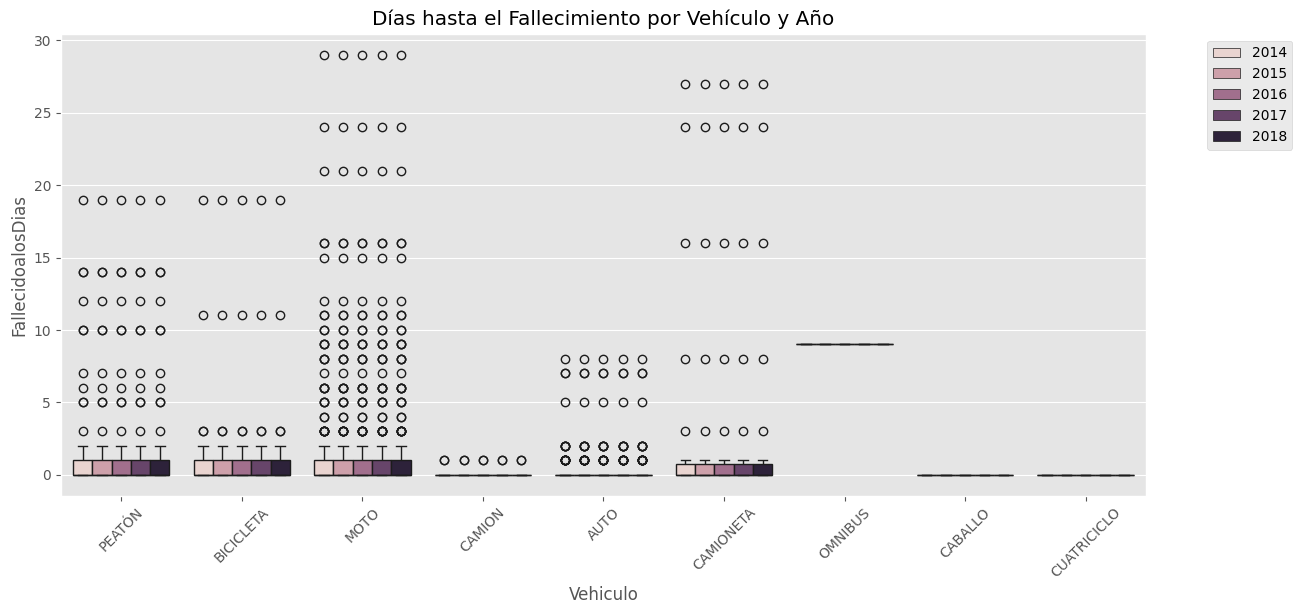

In [13]:
# Mapa de calor departamento x año
depto_year = df.groupby(['Departamento', 'Año']).size().unstack()
plt.figure(figsize=(12, 8))
sns.heatmap(depto_year, cmap="YlOrRd", annot=True, fmt='g')
plt.title('Accidentes por Departamento y Año')
plt.ylabel('Departamento')
plt.xlabel('Año')
plt.show()

# Evolución de tipos de siniestro
plt.figure(figsize=(14, 6))
sns.countplot(x='Año', hue='TipodeSiniestro', data=df, palette='Set2')
plt.title('Distribución de Tipos de Siniestro por Año')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# Supervivencia por tipo de vehículo
plt.figure(figsize=(14, 6))
sns.boxplot(x='Vehiculo', y='FallecidoalosDias', hue='Año', data=df)
plt.title('Días hasta el Fallecimiento por Vehículo y Año')
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

MODELO ARIMA PARA PRONÓSTICO DE ACCIDENTES

<ipython-input-14-615c5c4785aa>:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  ts_data = df.groupby(pd.Grouper(key='Fechayhora', freq='M')).size()
<ipython-input-14-615c5c4785aa>:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  ts_data = ts_data.asfreq('M')  # Asegurar frecuencia mensual


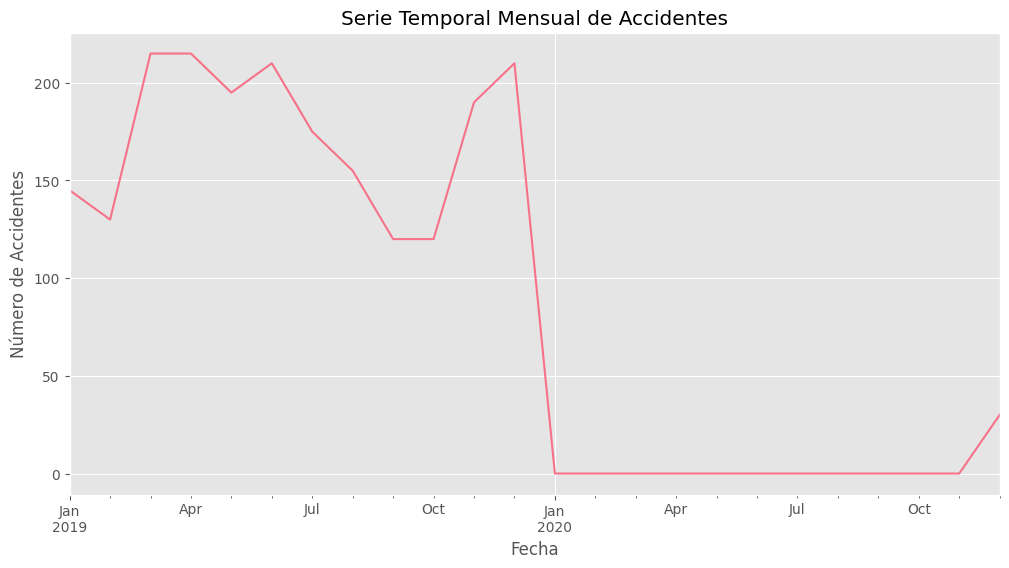

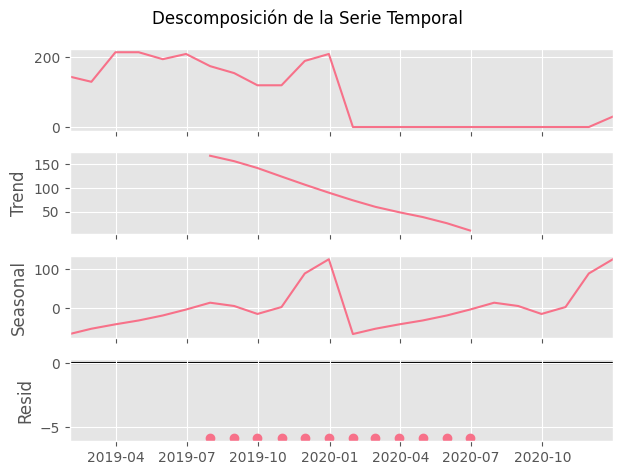

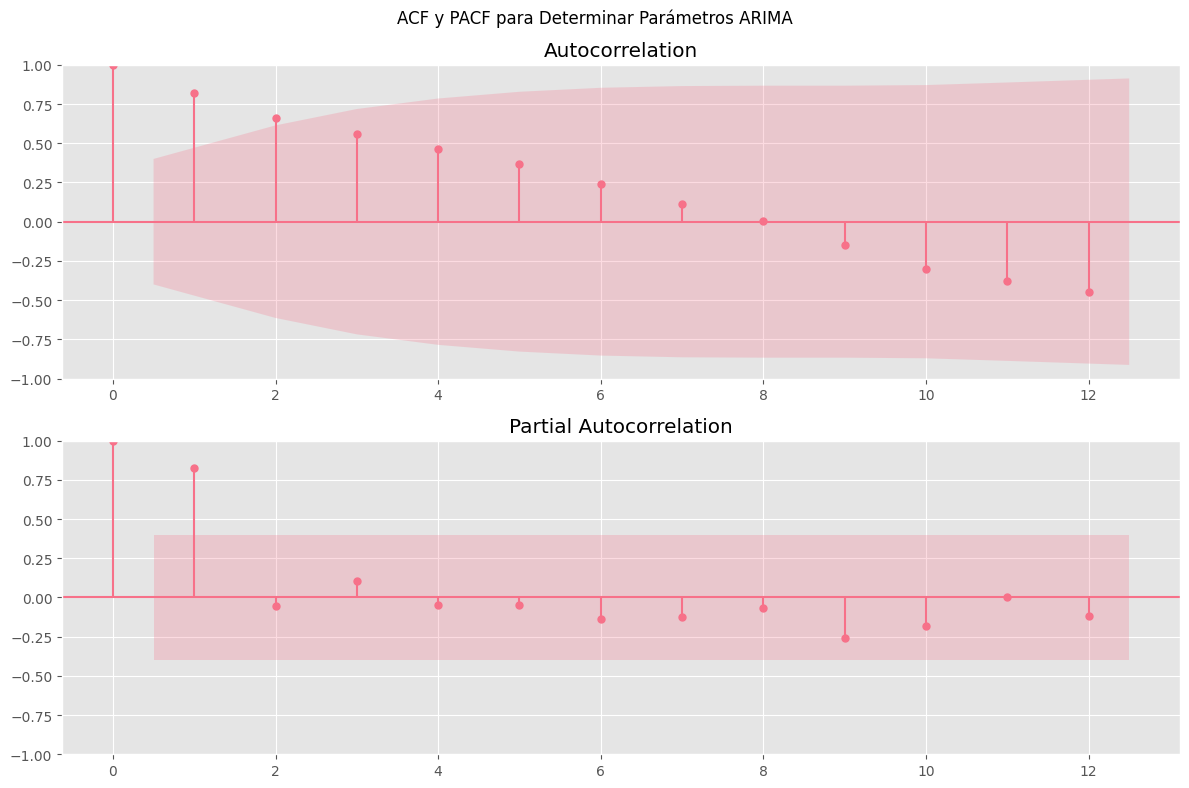

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   12
Model:                 ARIMA(1, 1, 1)   Log Likelihood                 -55.000
Date:                Tue, 22 Apr 2025   AIC                            116.000
Time:                        19:30:34   BIC                            117.194
Sample:                    01-31-2019   HQIC                           115.248
                         - 12-31-2019                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5173      0.707     -0.732      0.464      -1.903       0.869
ma.L1          0.9993    218.828      0.005      0.996    -427.895     429.894
sigma2      1124.8586   2.46e+05      0.005      0.9

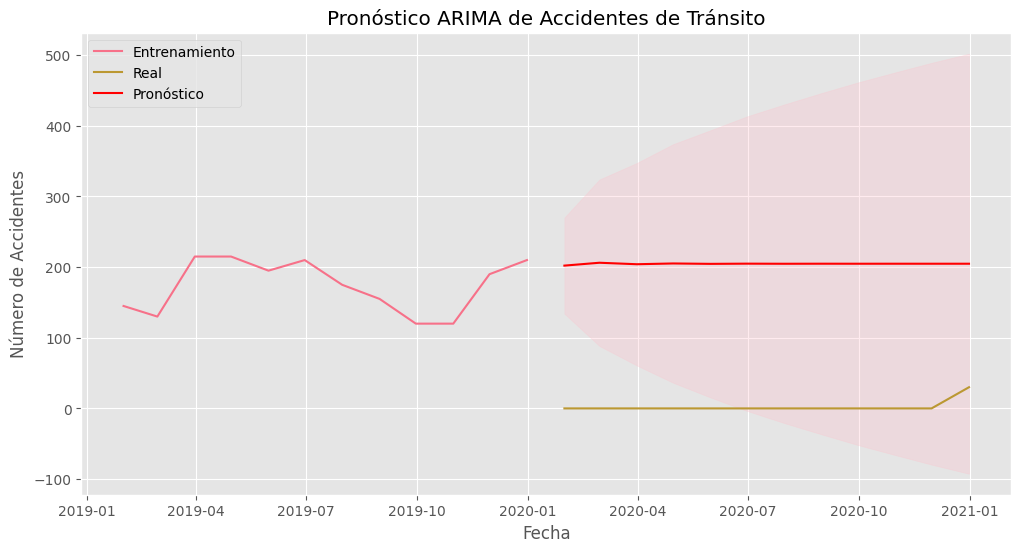

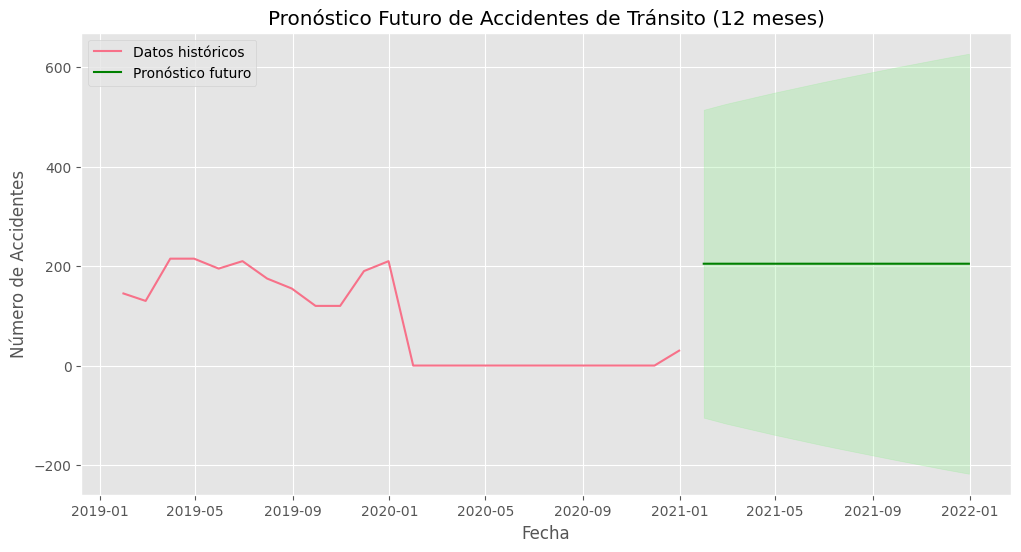

In [14]:
# Preparar datos para ARIMA (serie temporal mensual)
ts_data = df.groupby(pd.Grouper(key='Fechayhora', freq='M')).size()
ts_data = ts_data.asfreq('M')  # Asegurar frecuencia mensual

# Visualizar la serie temporal
plt.figure(figsize=(12, 6))
ts_data.plot()
plt.title('Serie Temporal Mensual de Accidentes')
plt.ylabel('Número de Accidentes')
plt.xlabel('Fecha')
plt.grid(True)
plt.show()

# Descomposición de la serie temporal
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(ts_data, model='additive')
decomposition.plot()
plt.suptitle('Descomposición de la Serie Temporal')
plt.tight_layout()
plt.show()

# ACF y PACF para determinar parámetros ARIMA
from statsmodels.tsa.arima.model import ARIMA
import numpy as np
from sklearn.metrics import mean_squared_error
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf # Import plot_acf and plot_pacf

# Calculate the maximum allowable lags (50% of the sample size)
max_lags = len(ts_data) // 2

# Create subplots for ACF and PACF
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8)) # Create ax1 and ax2

plot_acf(ts_data, ax=ax1, lags=max_lags)  # Using max_lags for ACF
plot_pacf(ts_data, ax=ax2, lags=max_lags) # Using max_lags for PACF
plt.suptitle('ACF y PACF para Determinar Parámetros ARIMA')
plt.tight_layout()
plt.show()

# Dividir en train y test (usaremos los últimos 12 meses para test)
train = ts_data[:-12]
test = ts_data[-12:]

# Entrenar modelo ARIMA
# Parámetros (p,d,q) pueden ajustarse según ACF/PACF y pruebas
model = ARIMA(train, order=(1, 1, 1))
model_fit = model.fit()

# Resumen del modelo
print(model_fit.summary())

# Pronóstico
forecast = model_fit.get_forecast(steps=12)
forecast_mean = forecast.predicted_mean
forecast_ci = forecast.conf_int()

# Evaluar el modelo en los datos de test
mse = mean_squared_error(test, forecast_mean)
print(f"\nError Cuadrático Medio (MSE): {mse:.2f}")
print(f"Raíz del Error Cuadrático Medio (RMSE): {np.sqrt(mse):.2f}")

# Visualizar pronóstico
plt.figure(figsize=(12, 6))
plt.plot(train.index, train, label='Entrenamiento')
plt.plot(test.index, test, label='Real')
plt.plot(test.index, forecast_mean, label='Pronóstico', color='red')
plt.fill_between(test.index,
                forecast_ci.iloc[:, 0],
                forecast_ci.iloc[:, 1], color='pink', alpha=0.3)
plt.title('Pronóstico ARIMA de Accidentes de Tránsito')
plt.ylabel('Número de Accidentes')
plt.xlabel('Fecha')
plt.legend()
plt.grid(True)
plt.show()

# Pronóstico a futuro (12 meses más allá de los datos)
future_forecast = model_fit.get_forecast(steps=24)  # 12 meses de test + 12 futuros
future_mean = future_forecast.predicted_mean[-12:]  # Solo los futuros
future_ci = future_forecast.conf_int()[-12:]

# Visualizar pronóstico futuro
plt.figure(figsize=(12, 6))
plt.plot(ts_data.index, ts_data, label='Datos históricos')
plt.plot(future_mean.index, future_mean, label='Pronóstico futuro', color='green')
plt.fill_between(future_mean.index,
                future_ci.iloc[:, 0],
                future_ci.iloc[:, 1], color='lightgreen', alpha=0.3)
plt.title('Pronóstico Futuro de Accidentes de Tránsito (12 meses)')
plt.ylabel('Número de Accidentes')
plt.xlabel('Fecha')
plt.legend()
plt.grid(True)
plt.show()